## Python Project On Weather Forecast Dataset


##      About Dataset

The dataset of weather Forecast gives information about the weather condition at a particular location. It records Temperature, dew Point temperature, Relative humidity, Pressure, Wind speed, Visibility and other conditions. 


The dataset was downloaded from kaggle (link given below) and we will be making an exploratory analysis of the data, visualise it and solve few questions on data Analytics.https://www.kaggle.com/datasets/swatikhedekar/python-project-on-weather-dataset

## Downloading the dataset

The dataset used for this project can be download with the link given below.
https://www.kaggle.com/datasets/swatikhedekar/python-project-on-weather-dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/swatikhedekar/python-project-on-weather-dataset'

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\python-project-on-weather-dataset" (use force=True to force download)


The dataset has been downloaded and extracted.

In [5]:
data_dir = '.\python-project-on-weather-dataset'

In [6]:
import os
os.listdir(data_dir)

['Weather Data.csv']

## Importing required libraries

In [7]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## Data Preparation and Cleaning

In this section, we will do the basic data preparation and initial analysis such as reading the csv file to dataframe,  getting info on dataframe,dropping unnecessary series.

In [8]:
wd = pd.read_csv(data_dir+"/Weather Data.csv")

In [9]:
# Looking at the columns
wd.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [10]:
# Looking at the datatypes of all the series
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [11]:
# Looking for shape of dataset
wd.shape

(8784, 8)

In [12]:
# Index of the dataframe
wd.index

RangeIndex(start=0, stop=8784, step=1)

In [13]:
wd.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [14]:
wd['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

The function .unique() shows all the unique values in a single column only.

In [15]:
wd.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

The .nunique shows the total number of unique values in each column.It can be applied on a single column as on whole dataframe.

In [16]:
wd['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

.value_counts() shows total number of unique value in a column.

 ## Handling Missing Values

In [17]:
# Checking for missing values
wd.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

There are no missing values in this dataset.

## Q.1  Find the number of time when the 'Weather is Mostly Cloudy'.

In [18]:
wd.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [19]:
# value counts
wd.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [20]:
# Filtering
wd[wd.Weather== 'Mostly Cloudy']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
28,1/2/2012 4:00,2.9,-2.3,69,32,25.0,99.26,Mostly Cloudy
29,1/2/2012 5:00,2.6,-2.3,70,32,25.0,99.21,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8743,12/30/2012 7:00,-9.9,-13.2,77,19,25.0,100.48,Mostly Cloudy
8748,12/30/2012 12:00,-12.2,-15.7,75,26,48.3,100.91,Mostly Cloudy
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


In [21]:
# groupby()


wd.groupby('Weather').get_group('Mostly Cloudy')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
28,1/2/2012 4:00,2.9,-2.3,69,32,25.0,99.26,Mostly Cloudy
29,1/2/2012 5:00,2.6,-2.3,70,32,25.0,99.21,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8743,12/30/2012 7:00,-9.9,-13.2,77,19,25.0,100.48,Mostly Cloudy
8748,12/30/2012 12:00,-12.2,-15.7,75,26,48.3,100.91,Mostly Cloudy
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


So, we can find the number of time when Weather is Mostly Cloudy by three different way as value_counts(), filtering and groupby.

## Q.2 Find the number of times when the 'visibility distance is exactly 8km'.

In [22]:
wd[wd['Visibility_km']== 8]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
98,1/5/2012 2:00,-5.4,-8.3,80,9,8.0,100.28,Snow
...,...,...,...,...,...,...,...,...
8688,12/28/2012 0:00,-4.2,-5.7,89,19,8.0,100.78,"Freezing Drizzle,Snow"
8719,12/29/2012 7:00,-14.8,-16.4,88,7,8.0,101.22,Fog
8724,12/29/2012 12:00,-10.5,-11.6,92,11,8.0,100.93,"Snow Showers,Fog"
8733,12/29/2012 21:00,-9.8,-11.8,85,24,8.0,100.24,"Snow,Fog"


So, the visibility distance for exactly 8km is 122 times.

## Q.3 Rename the column name 'Visibility_km ' of the dataframe to 'Visibility distance'.

In [23]:
 # only for this comands
wd.rename(columns={'Visibility_km':'Visibility distance'})

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility distance,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [24]:
 # change column name permanently
wd.rename(columns={'Weather':'Weather Condition'},inplace=True)

 ## Q.4 What is the variance of 'wind speed ' in this data? 

In [25]:
wd['Press_kPa'].var()

0.7123440111838408

## Q.5 Find all instances when 'Relative Humidity is above 89' and 'Wind speed 'is 28 .

In [26]:
wd[(wd['Rel Hum_%'] > 89)& (wd['Wind Speed_km/h']== 28)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
550,1/23/2012 22:00,3.6,2.2,91,28,25.0,100.10,Cloudy
6197,9/15/2012 5:00,13.7,12.7,94,28,9.7,101.14,"Drizzle,Fog"
6282,9/18/2012 18:00,20.0,18.9,93,28,6.4,99.19,Rain
8090,12/3/2012 2:00,6.8,5.3,90,28,25.0,100.99,Mostly Cloudy
8260,12/10/2012 4:00,-3.3,-4.4,92,28,3.6,100.73,"Freezing Drizzle,Fog"
8420,12/16/2012 20:00,-4.7,-6.0,91,28,12.9,101.18,Snow
8427,12/17/2012 3:00,-2.6,-3.7,92,28,8.0,100.95,"Freezing Rain,Ice Pellets,Fog"
8523,12/21/2012 3:00,0.9,0.0,94,28,4.8,100.12,"Rain,Snow,Ice Pellets"
8542,12/21/2012 22:00,0.7,0.0,95,28,3.6,97.75,Snow
8547,12/22/2012 3:00,1.1,0.1,93,28,9.7,97.93,"Drizzle,Snow,Fog"


## Q.6  What is the mean value of each column against each 'Weather condition'?

In [27]:
wd.groupby('Weather Condition').mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


## Q.7  Find all instances when:¶

a) 'Weather is mainly clear' and 'wind speed less than 22 km/h' or

b) 'Visibility' is above 35 km.

In [28]:
wd[(wd['Weather Condition'] == 'Mainly Clear') & (wd['Wind Speed_km/h']< 22) |(wd['Visibility_km']>35) ]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
60,1/3/2012 12:00,-14.9,-22.6,52,20,24.1,101.34,Mainly Clear
63,1/3/2012 15:00,-14.8,-22.2,53,19,24.1,101.44,Mainly Clear
73,1/4/2012 1:00,-17.9,-24.1,58,11,25.0,101.86,Mainly Clear
74,1/4/2012 2:00,-18.1,-23.8,61,15,25.0,101.89,Mainly Clear
75,1/4/2012 3:00,-18.5,-24.6,59,13,25.0,101.88,Mainly Clear
...,...,...,...,...,...,...,...,...
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear
8757,12/30/2012 21:00,-13.8,-16.5,80,20,25.0,101.50,Mainly Clear


## WordCloud

In [31]:
pip install Wordcloud

Note: you may need to restart the kernel to use updated packages.


In [32]:


from wordcloud import WordCloud, STOPWORDS



In [33]:
text = "".join(w for w in wd['Weather Condition'])


In [34]:
wc = WordCloud(width= 1600,height=800,colormap='prism',background_color = 'white').generate(text)

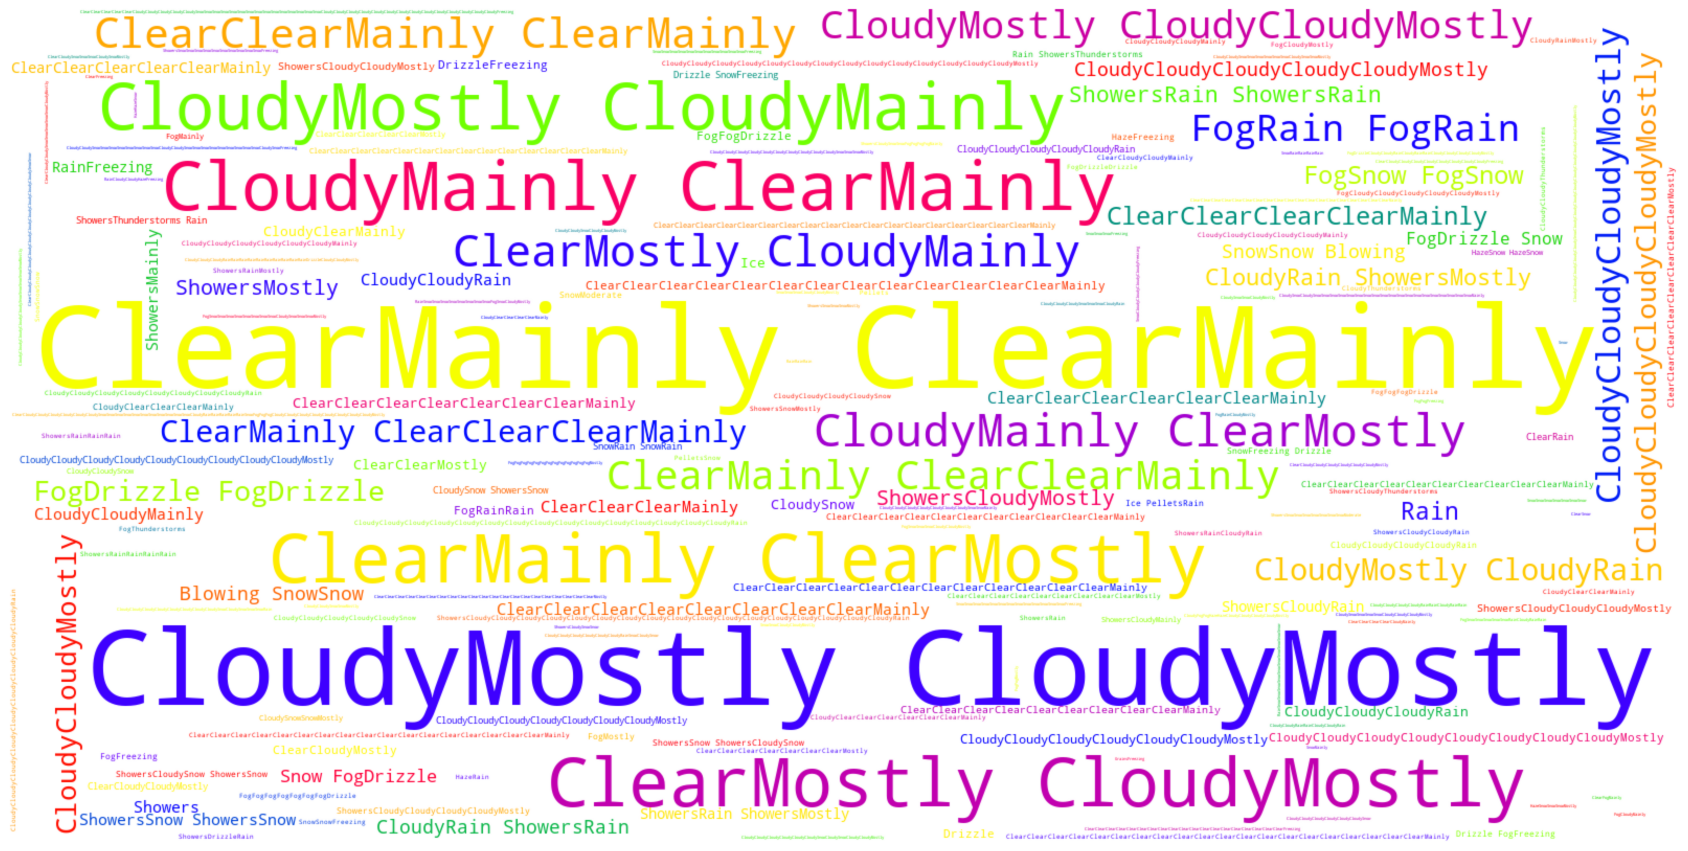

In [35]:
plt.figure(figsize = (30, 25))
plt.imshow(wc, interpolation="gaussian")
plt.axis("off")
plt.show()

The word that appear most in the dataset are in the bigger font while the ones that appears less are relatively smaller font. A collage of these words is created.

## Inference and Conclusion

A detailed data analysis is done for given dataset of Weather Forecast and also done some specific question on dataset. and from  above, we conclude that mainly clear and mostly cloudy weather occurs on the most number of days.

## References

All the useful link are listed below:
1. https://www.kaggle.com/datasets/swatikhedekar/python-project-on-weather-dataset
2. https://jovian.ai/


In [36]:
pwd

'C:\\Users\\ansar'